# Bitcoin Trend Analysis

#### Quick Observations of Positive Crypto Trends

Author: Miguel Santana

#### Project Methodology
The goal of this project is to observe Bitcoin trends, visualize them and measure simple odds of positive trends over single and double day periods. 

## Important Note
#### None of the following is meant to be financial advice. This is simply an observation of trends in the market. 

# Obtain | Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('seaborn-poster') 
sns.set_style('whitegrid')
pd.set_option('mode.chained_assignment', None)

In [21]:
from pandas_datareader import data, wb
import datetime
from plotly.offline import plot
import cufflinks as cf
cf.go_offline()

In [3]:
start = datetime.datetime(2021, 4, 1)
end = datetime.datetime(2021, 7, 31)
# # data manually downloaded and uploaded
# df = data.DataReader('BTC-USD', 'yahoo', start, end)

# Scrub 
#### Importing and Combining Stock Files

In [4]:
df = pd.read_csv('BTCUSD.csv')
# df = pd.read_csv('BTCUSD.csv',index_col='Date')

In [5]:
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Day'] = df.Date.dt.day
# df['Month'] = df.Date.dt.month
df['Month'] = df['Date'].dt.month_name()
df['Day_of_Week'] = df['Date'].dt.day_name()

# Exploratory Data Analysis

In [6]:
# df.iplot(x='Date',y='Open',yTitle='Price',title='Bitcoin | "Open" Price');
# plt.ylabel('Price', size = 12)
# plt.title('Bitcoin | Last 120 Days', size = 16);

df2 = df.set_index('Date').copy()
df2[['Open', 'High', 'Low', 'Close']].iplot(kind='candle',yTitle='Price',title='Bitcoin Price')

In [7]:
d2n = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,
       'Saturday':6,'Sunday':7}
# monthly transformations
april = df[df['Month'] == 'April'].groupby(by='Day_of_Week')['Open'].mean().reset_index()
april['Day_of_Week2'] = april['Day_of_Week'].replace(d2n)

may = df[df['Month'] == 'May'].groupby(by='Day_of_Week')['Open'].mean().reset_index()
may['Day_of_Week2'] = may['Day_of_Week'].replace(d2n)

june = df[df['Month'] == 'June'].groupby(by='Day_of_Week')['Open'].mean().reset_index()
june['Day_of_Week2'] = june['Day_of_Week'].replace(d2n)

july = df[df['Month'] == 'July'].groupby(by='Day_of_Week')['Open'].mean().reset_index()
july['Day_of_Week2'] = july['Day_of_Week'].replace(d2n)

### Day of Week | Average Trends 

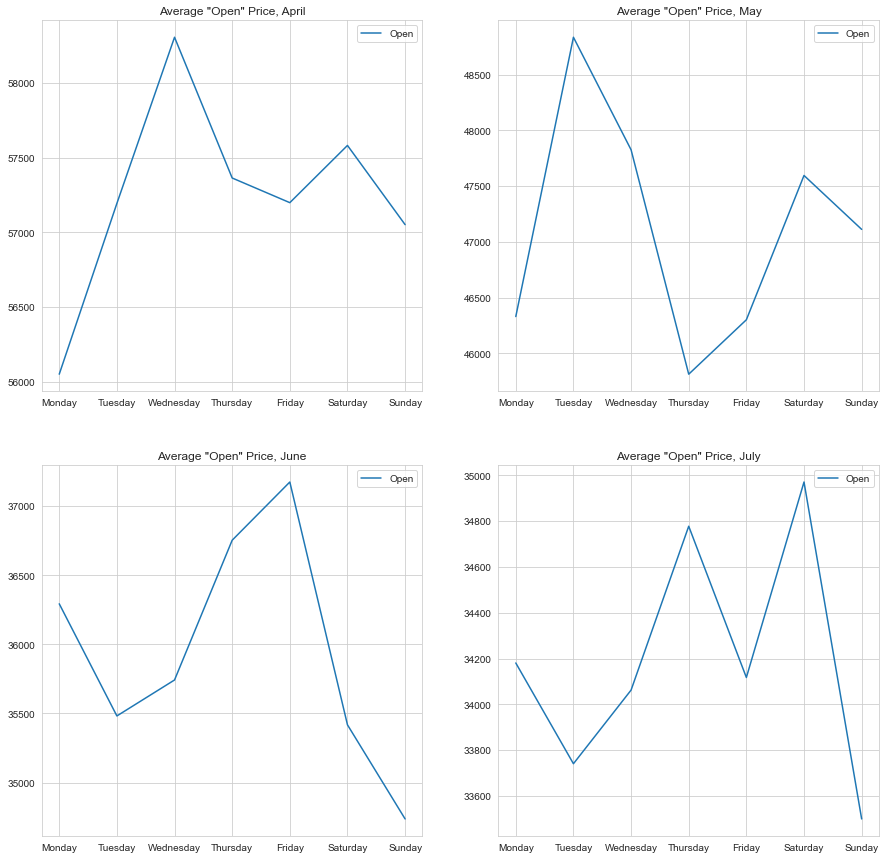

In [8]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
april.sort_values(by='Day_of_Week2').plot(x='Day_of_Week',y='Open',xlabel='',title='Average "Open" Price, April',ax=plt.gca());
plt.subplot(2,2,2)
may.sort_values(by='Day_of_Week2').plot(x='Day_of_Week',y='Open',xlabel='',title='Average "Open" Price, May',ax=plt.gca());
plt.subplot(2,2,3)
june.sort_values(by='Day_of_Week2').plot(x='Day_of_Week',y='Open',xlabel='',title='Average "Open" Price, June',ax=plt.gca());
plt.subplot(2,2,4)
july.sort_values(by='Day_of_Week2').plot(x='Day_of_Week',y='Open',xlabel='',title='Average "Open" Price, July',ax=plt.gca());

# plt.savefig('dayofweek.jpg', dpi=300)

### Day of Month | Average Trends 

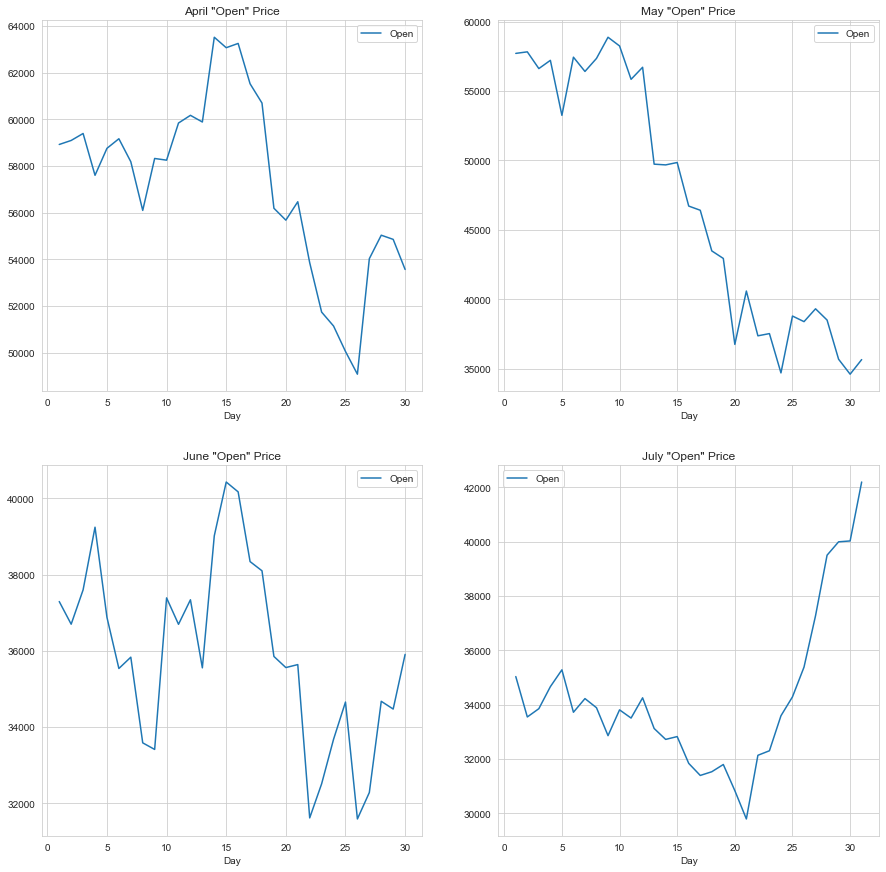

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
df[df['Month'] == 'April'].plot(x='Day',y='Open',title='April "Open" Price',ax=plt.gca());
plt.subplot(2,2,2)
df[df['Month'] == 'May'].plot(x='Day',y='Open',title='May "Open" Price',ax=plt.gca());
plt.subplot(2,2,3)
df[df['Month'] == 'June'].plot(x='Day',y='Open',title='June "Open" Price',ax=plt.gca());
plt.subplot(2,2,4)
df[df['Month'] == 'July'].plot(x='Day',y='Open',title='July "Open" Price',ax=plt.gca());

# plt.savefig('dayofmonth.jpg', dpi=300)

## Calculating Financial Metrics
* SMA
* Bollinger Bands
* Distance
* Frequency

In [10]:
def finances(df):
    # simple moving averages
    df['5D_SMA'] = df['Close'].rolling(5).mean()
    # bollinger band calculations
    df['Upper_Band'] = df['5D_SMA'] + (2 * df['Close'].rolling(5).std())
    df['Lower_Band'] = df['5D_SMA'] - (2 * df['Close'].rolling(5).std())
    df['SMA_BOL_Dist'] = df['5D_SMA'] - df['Lower_Band']
    # find quartile, decile
    df['QuantileRank']= pd.qcut(df['SMA_BOL_Dist'],q = 4,labels = False)
    df['DecileRank']= pd.qcut(df['SMA_BOL_Dist'],q = 10,labels = False)
    # calculating ranges
    df['Max_Range'] = round(df['High'] - df['Low'],2)
    df['OH_Range'] = round(df['High'] - df['Open'],2)

In [11]:
def breakout(df):
    # single day breakout
    df['Shift_1'] = df['Close'].shift(-1)
    svalslist = df[(df['Shift_1'] > df['Open'])].index.tolist()
    df['SD_Breakout'] = 1
    df.loc[svalslist,'SD_Breakout'] = 2
    df['SD_Breakout'] = df['SD_Breakout'].apply(lambda x: True if x == 2 else False)
    df['SD_Breakout2'] = df['SD_Breakout'].apply(lambda x: 1 if x == True else 0)
    # double day breakout
    df['Shift_2'] = df['Close'].shift(-2)
    valslist = df[(df['Shift_1'] > df['Open']) & (df['Shift_2'] > df['Shift_1'])].index.tolist()
    df['DD_Breakout'] = 1
    df.loc[valslist,'DD_Breakout'] = 2
    df['DD_Breakout'] = df['DD_Breakout'].apply(lambda x: True if x == 2 else False)
    df['DD_Breakout2'] = df['DD_Breakout'].apply(lambda x: 1 if x == True else 0)

In [12]:
finances(df)
breakout(df)

In [13]:
# clip first four / null columns
df = df[4:]

# Odds of Positive Trends
#### Decile Rank, SMA Distance from Bollinger Band

In [14]:
df['DecileRank'][-1:]

122    2.0
Name: DecileRank, dtype: float64

In [27]:
# sum of positives (true) / total for percentage
sdb = df[df['DecileRank'] == 2]['SD_Breakout2'].sum() / len(df[df['DecileRank'] == 2]['SD_Breakout2'])
print(f'Percent chance, tomorrow\'s close will be higher than today\'s open: {round(sdb,2)}')

Percent chance, tomorrow's close will be higher than today's open: 0.5


In [25]:
# sum of positives (true) / total for percentage
ddb = df[df['DecileRank'] == 2]['DD_Breakout2'].sum() / len(df[df['DecileRank'] == 2]['DD_Breakout2'])
print(f'Percent chance, double day breakout: {round(ddb,2)}')

Percent chance, double day breakout: 0.33


In [28]:
print('Average Open-High Distance/Range')
round(df['OH_Range'].mean(),2) # average open / high range

Average Open-High Distance/Range


1278.57

In [30]:
print('Average High-Low Distance/Range')
round(df['Max_Range'].mean(),2) # average high/low range

Average High-Low Distance/Range


2980.37

#### Financial Statistics | Quant Figures

In [19]:
df2 = df2[['Open', 'High', 'Low', 'Close','Volume']]

In [20]:
qf = cf.QuantFig(df2,title='Bitcoin | Quant Figure',legend='center',name='GS')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_sma([10],width=2,color=['green'],legendgroup=True)
qf.add_macd()
qf.add_volume()
qf.iplot()

#### Future Work
This notebook provided an introduction to Bitcoin analysis and trend observation that may used in investment research. Future work should include analysis of intra-day trends and trends over a longer period of time. 

For any additional questions, please reach out via email at santana2.miguel@gmail.com or on [LinkedIn.](https://www.linkedin.com/in/miguel-angel-santana-ii-mba-51467276/)